# Two-output models


## Simple two-output model
In this exercise, you will use the tournament data to build one model that makes two predictions: the scores of both teams in a given game. Your inputs will be the seed difference of the two teams, as well as the predicted score difference from the model you built in chapter 3.

The output from your model will be the predicted score for team 1 as well as team 2. This is called "multiple target regression": one model making more than one prediction.

### code

In [3]:
from keras.layers import Input, Concatenate, Dense
from keras.models import Model


In [4]:
# Define the input
input_tensor = Input(shape=(2,))

# Define the output
output_tensor = Dense(2)(input_tensor)

# Create a model
model = Model(input_tensor, output_tensor)

# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error')

## Fit a model with two outputs
Now that you've defined your 2-output model, fit it to the tournament data. I've split the data into games_tourney_train and games_tourney_test, so use the training set to fit for now.

This model will use the pre-tournament seeds, as well as your pre-tournament predictions from the regular season model you built previously in this course.

As a reminder, this model will predict the scores of both teams.

### init

In [5]:
###################
##### Dataframe
###################

#upload and download

from downloadfromFileIO import saveFromFileIO
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
uploadToFileIO(games_tourney_train, games_tourney_test)
"""

tobedownloaded="""
{pandas.core.frame.DataFrame: {'games_tourney_test.csv': 'https://file.io/olmpTs',
  'games_tourney_train.csv': 'https://file.io/3gzcMP'}}
"""
prefix='data_from_datacamp/Chap4-Exercise1.2_'
saveFromFileIO(tobedownloaded, prefix=prefix, proxy="10.225.92.1:80")

#initialisation

import pandas as pd
games_tourney_test = pd.read_csv(prefix+'games_tourney_test.csv',index_col=0)
games_tourney_train = pd.read_csv(prefix+'games_tourney_train.csv',index_col=0)



Téléchargements à lancer

{pandas.core.frame.DataFrame: {"games_tourney_test.csv": "https://file.io/olmpTs",
  "games_tourney_train.csv": "https://file.io/3gzcMP"}}

{'pandas.core.frame.DataFrame': {'games_tourney_test.csv': 'https://file.io/olmpTs', 'games_tourney_train.csv': 'https://file.io/3gzcMP'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 43425    0 43425    0     0  59979      0 --:--:-- --:--:-- --:--:-- 59979
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  179k    0  179k    0     0   305k      0 --:--:-- --:--:

### code

In [6]:
# Fit the model
model.fit(games_tourney_train[['seed_diff', 'pred']],
  		  games_tourney_train[['score_1', 'score_2']],
  		  verbose=True,
  		  epochs=100,
  		  batch_size=16384)




Epoch 1/100





3430/3430 [==============================] - 0s 35us/step - loss: 71.6213
Epoch 2/100
3430/3430 [==============================] - 0s 1us/step - loss: 71.6203
Epoch 3/100
3430/3430 [==============================] - 0s 1us/step - loss: 71.6193
Epoch 4/100
3430/3430 [==============================] - 0s 1us/step - loss: 71.6184
Epoch 5/100
3430/3430 [==============================] - 0s 1us/step - loss: 71.6174
Epoch 6/100
3430/3430 [==============================] - 0s 1us/step - loss: 71.6164
Epoch 7/100
3430/3430 [==============================] - 0s 1us/step - loss: 71.6154
Epoch 8/100
3430/3430 [==============================] - 0s 1us/step - loss: 71.6144
Epoch 9/100
3430/3430 [==============================] - 0s 1us/step - loss: 71.6134
Epoch 10/100
3430/3430 [==============================] - 0s 1us/step - loss: 71.6124
Epoch 11/100
3430/3430 [==============================] - 0s 1us/step - loss: 71.6114
Epoch 12/100
3430/3430 [==============================

Epoch 75/100
3430/3430 [==============================] - 0s 0us/step - loss: 71.5474
Epoch 76/100
3430/3430 [==============================] - 0s 1us/step - loss: 71.5464
Epoch 77/100
3430/3430 [==============================] - 0s 1us/step - loss: 71.5453
Epoch 78/100
3430/3430 [==============================] - 0s 1us/step - loss: 71.5443
Epoch 79/100
3430/3430 [==============================] - 0s 1us/step - loss: 71.5434
Epoch 80/100
3430/3430 [==============================] - 0s 1us/step - loss: 71.5423
Epoch 81/100
3430/3430 [==============================] - 0s 1us/step - loss: 71.5414
Epoch 82/100
3430/3430 [==============================] - 0s 1us/step - loss: 71.5404
Epoch 83/100
3430/3430 [==============================] - 0s 1us/step - loss: 71.5394
Epoch 84/100
3430/3430 [==============================] - 0s 1us/step - loss: 71.5383
Epoch 85/100
3430/3430 [==============================] - 0s 1us/step - loss: 71.5373
Epoch 86/100
3430/3430 [==============================

## Inspect the model (I)
Now that you've fit your model, let's take a look at it. You can use the .get_weights() method to inspect your model's weights.

The input layer will have 4 weights: 2 for each input times 2 for each output.

The output layer will have 2 weights, one for each output.

### code

In [7]:
# Print the model's weights
print(model.get_weights())

# Print the column means of the training data
print(games_tourney_train.mean())

[array([[ 0.84995717, -0.46896636],
       [-0.95621955, -0.67644256]], dtype=float32), array([0.09994087, 0.09994087], dtype=float32)]
season        1.998074e+03
team_1        5.556771e+03
team_2        5.556771e+03
home          0.000000e+00
seed_diff     0.000000e+00
score_diff    0.000000e+00
score_1       7.162128e+01
score_2       7.162128e+01
won           5.000000e-01
pred         -1.624447e-14
dtype: float64


## Evaluate the model
Now that you've fit your model and inspected it's weights to make sure it makes sense, evaluate it on the tournament test set to see how well it performs on new data.

### code

In [8]:
# Evaluate the model on the tournament test data
print(model.evaluate(games_tourney_test[['seed_diff', 'pred']],
  		  games_tourney_test[['score_1', 'score_2']], verbose=False))

68.9411046421943


# Single model for classification and regression


## Classification and regression in one model
Now you will create a different kind of 2-output model. This time, you will predict the score difference, instead of both team's scores and then you will predict the probability that team 1 won the game. This is a pretty cool model: it is going to do both classification and regression!

In this model, turn off the bias, or intercept for each layer. Your inputs (seed difference and predicted score difference) have a mean of very close to zero, and your outputs both have means that are close to zero, so your model shouldn't need the bias term to fit the data well.

### code

In [9]:
# Create an input layer with 2 columns
input_tensor = Input(shape=(2,))

# Create the first output
output_tensor_1 = Dense(1, activation='linear', use_bias=False)(input_tensor)

# Create the second output (use the first output as input here)
output_tensor_2 = Dense(1, activation='sigmoid', use_bias=False)(output_tensor_1)

# Create a model with 2 outputs
model = Model(input_tensor, [output_tensor_1, output_tensor_2])

## Compile and fit the model
Now that you have a model with 2 outputs, compile it with 2 loss functions: mean absolute error (MAE) for 'score_diff' and binary cross-entropy (also known as logloss) for 'won'. Then fit the model with 'seed_diff' and 'pred' as inputs. For outputs, predict 'score_diff' and 'won'.

This model can use the scores of the games to make sure that close games (small score diff) have lower win probabilities than blowouts (large score diff).

The regression problem is easier than the classification problem because MAE punishes the model less for a loss due to random chance. For example, if score_diff is -1 and won is 0, that means team_1 had some bad luck and lost by a single free throw. The data for the easy problem helps the model find a solution to the hard problem.

### code

In [14]:
# Import the Adam optimizer
from keras.optimizers import Adam

# Compile the model with 2 losses and the Adam optimzer with a higher learning rate
model.compile(loss=['mean_absolute_error', 'binary_crossentropy'], optimizer=Adam(lr=0.01))

# Fit the model to the tournament training data, with 2 inputs and 2 outputs
model.fit(games_tourney_train[['seed_diff', 'pred']],
          [games_tourney_train[['score_diff']], games_tourney_train[['won']]],
          epochs=10,
          verbose=True,
          batch_size=16384)

Epoch 1/10
3430/3430 [==============================] - 0s 70us/step - loss: 12.2411 - dense_4_loss: 10.5424 - dense_5_loss: 1.6987
Epoch 2/10
3430/3430 [==============================] - 0s 1us/step - loss: 12.2190 - dense_4_loss: 10.5197 - dense_5_loss: 1.6993
Epoch 3/10
3430/3430 [==============================] - 0s 1us/step - loss: 12.1968 - dense_4_loss: 10.5024 - dense_5_loss: 1.6943
Epoch 4/10
3430/3430 [==============================] - 0s 1us/step - loss: 12.1745 - dense_4_loss: 10.4868 - dense_5_loss: 1.6877
Epoch 5/10
3430/3430 [==============================] - 0s 1us/step - loss: 12.1523 - dense_4_loss: 10.4702 - dense_5_loss: 1.6821
Epoch 6/10
3430/3430 [==============================] - 0s 1us/step - loss: 12.1300 - dense_4_loss: 10.4521 - dense_5_loss: 1.6779
Epoch 7/10
3430/3430 [==============================] - 0s 1us/step - loss: 12.1077 - dense_4_loss: 10.4323 - dense_5_loss: 1.6754
Epoch 8/10
3430/3430 [==============================] - 0s 1us/step - loss: 12.085

## Inspect the model (II)
Now you should take a look at the weights for this model. In particular, note the last weight of the model. This weight converts the predicted score difference to a predicted win probability. If you multiply the predicted score difference by the last weight of the model and then apply the sigmoid function, you get the win probability of the game.

### code

In [16]:
# Print the model weights
print(model.get_weights())

# Print the training data means
print(games_tourney_train.mean())

[array([[0.3627698 ],
       [0.03007342]], dtype=float32), array([[-0.6954728]], dtype=float32)]
season        1.998074e+03
team_1        5.556771e+03
team_2        5.556771e+03
home          0.000000e+00
seed_diff     0.000000e+00
score_diff    0.000000e+00
score_1       7.162128e+01
score_2       7.162128e+01
won           5.000000e-01
pred         -1.624447e-14
dtype: float64


In [17]:
# Import the sigmoid function from scipy
from scipy.special import expit as sigmoid

# Weight from the model
weight = 0.14

# Print the approximate win probability predicted close game
print(sigmoid(1 * weight))

# Print the approximate win probability predicted blowout game
print(sigmoid(10 * weight))

0.5349429451582145
0.8021838885585818


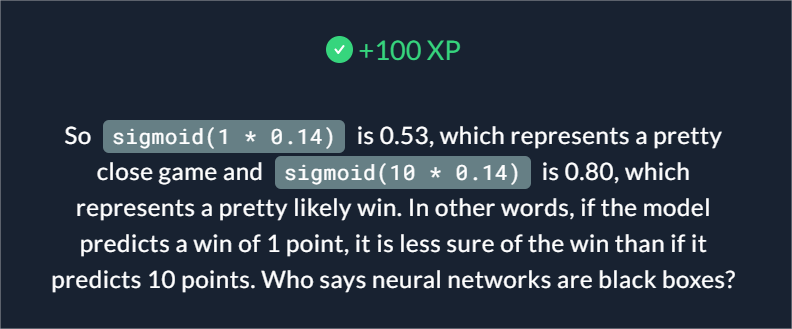

## Evaluate on new data with two metrics
Now that you've fit your model and inspected its weights to make sure they make sense, evaluate your model on the tournament test set to see how well it does on new data.

Note that in this case, Keras will return 3 numbers: the first number will be the sum of both the loss functions, and then the next 2 numbers will be the loss functions you used when defining the model.

Ready to take your deep learning to the next level? Check out "Convolutional Neural Networks for Image Processing".

### code

In [18]:
# Evaluate the model on new data
print(model.evaluate(games_tourney_test[['seed_diff', 'pred']],
          [games_tourney_test[['score_diff']], games_tourney_test[['won']]], verbose=False))

[11.585010272353443, 9.993942241763595, 1.5910679742471496]
